# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

In [4]:
df = df.dropna() #удаление пустых значений

Ниже представлены частотные графики параметров Freedom и Positive affect. Их распределения соответствуют равномерным.

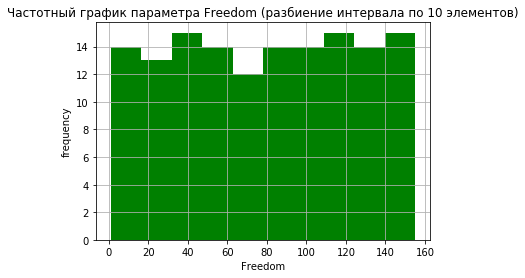

In [5]:
freedom = df['Freedom']
n, bins, patches = plt.hist(freedom, 10, facecolor='g')

plt.xlabel('Freedom')
plt.ylabel('frequency')
plt.title('Частотный график параметра Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

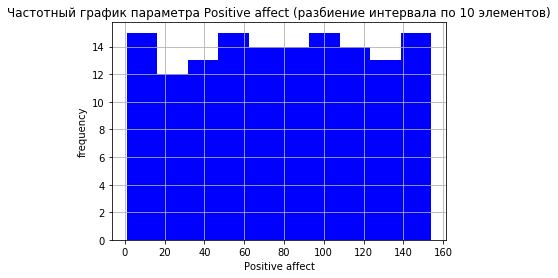

In [6]:
positive_affect = df['Positive affect']
n, bins, patches = plt.hist(positive_affect, 10, facecolor='b')

plt.xlabel('Positive affect')
plt.ylabel('frequency')
plt.title('Частотный график параметра Positive affect (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [7]:
print('Медиана: ', statistics.median(freedom))
print('Математическое ожидание: ', statistics.mean(freedom))
print('Стандартное отклонение: ', statistics.pstdev(freedom))
print('Дисперсия: ', statistics.pvariance(freedom))
print('Минимум: ', min(freedom))
print('Максимум: ', max(freedom))
print('Размах: ', max(freedom) - min(freedom))

if freedom.isnull().sum() == 0:
    print('Выбросов нет')
else:
    print('Найдено ', freedom.isnull().sum(), ' выбросов')

Медиана:  79.5
Математическое ожидание:  78.82857142857142
Стандартное отклонение:  44.9475794449399
Дисперсия:  2020.2848979591836
Минимум:  1.0
Максимум:  155.0
Размах:  154.0
Выбросов нет


In [8]:
# поиск моды
freedom_counts = {}
for fr in freedom:
    if fr not in freedom_counts:
        freedom_counts[fr] = 1
    else:
        freedom_counts[fr] += 1

        
# Алгоритм поиска максимума
maxp = 0
mode_duration = None
for k, v in freedom_counts.items():
    if maxp < v:
        maxp = v
        mode_duration = k

# проверка на наличие моды
if maxp == 1:
    print('Моды в данном множестве нет, все значения встречаются один раз')
else:
    print('Значение моды: ', mode_duration, 'Количество встречаемости: ', maxp)

Моды в данном множестве нет, все значения встречаются один раз


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

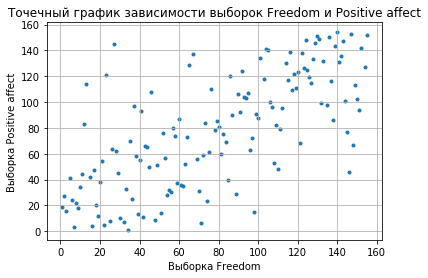

In [9]:
# 1. Графически 
plt.xlabel('Выборка Freedom')
plt.ylabel('Выборка Positive affect')
plt.title('Точечный график зависимости выборок Freedom и Positive affect')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')
plt.show()

Как видно из графика, между выборками Freedom и Positive affect есть корреляция. За исключением некоторых выбросов, чем больше (меньше) значение Freedom, тем больше (меньше) значение Positive affect.

In [10]:
# 2. Математически 
from scipy.stats import pearsonr

corr, p_value = pearsonr(freedom, positive_affect)
print('Коэффициент корреляции Пирсона: ', corr)

Коэффициент корреляции Пирсона:  0.6965670458090686


Коэффициент корреляции Пирсона равен 0.7, следовательно, между выборками есть средняя взаимосвязь. Положительный знак коэффициента говорит о том, что при увеличении значения первой выборки Freedom увеличивается значение второй выборки Positive affect. Соответственно, при отрицательном знаке - при уменьшении значения первой выборки уменьшается значения второй.

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [11]:
# 1. Централизация

print(statistics.mean(freedom))

78.82857142857142


In [12]:
# Т.к. среднее значение не равно 0, необходимо нормализовать
freedom_cent = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_cent))

6.496390726949487e-15


In [13]:
# 2. Масштабирование

print('Min freedom_cent = ', min(freedom_cent))
print('Max freedom_cent = ', max(freedom_cent))

Min freedom_cent =  -77.82857142857142
Max freedom_cent =  76.17142857142858


In [14]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_scaled = min_max_scaler.fit_transform(np.array(freedom_cent).reshape(-1,1))
print('Min freedom_scaled = ', min(freedom_scaled))
print('Max freedom_scaled = ', max(freedom_scaled))

Min freedom_scaled =  [-1.]
Max freedom_scaled =  [1.]


Построить матрицу корреляций для всех колонок таблицы

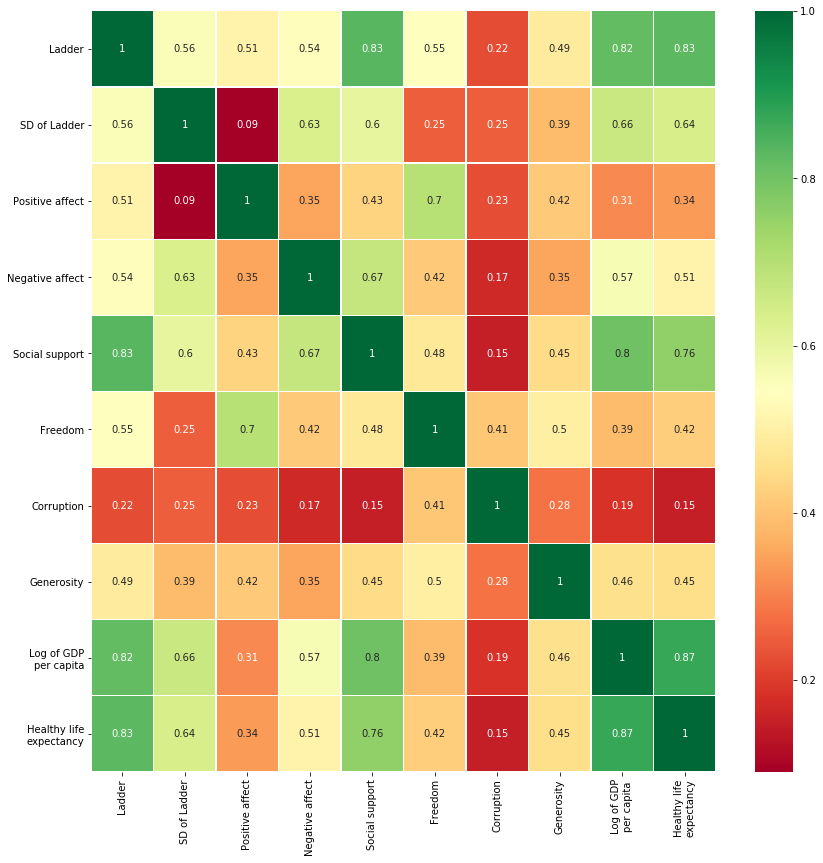

In [15]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(14,14)
plt.show()

Загрузить следующую таблицу: 

In [16]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

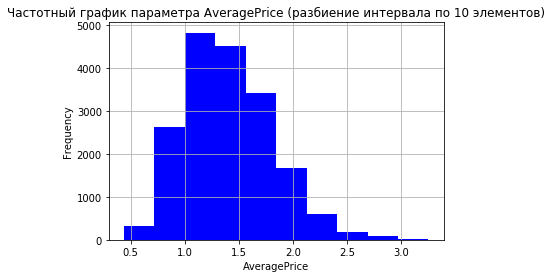

In [18]:
average_price = df['AveragePrice']
n, bins, patches = plt.hist(average_price, 10, facecolor='b')

plt.xlabel('AveragePrice')
plt.ylabel('Frequency')
plt.title('Частотный график параметра AveragePrice (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()
# Распределение соответсвует нормальному

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

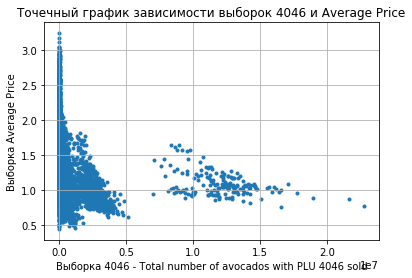

In [19]:
# 1. Графически 
plt.xlabel('Выборка 4046 - Total number of avocados with PLU 4046 sold')
plt.ylabel('Выборка Average Price')
plt.title('Точечный график зависимости выборок 4046 и Average Price')
plt.grid(True)
plt.scatter(df['4046'], df['AveragePrice'], marker='.')
plt.show()

In [20]:
# 2. Математически 
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['4046'], df['AveragePrice'])
print('Коэффициент корреляции Пирсона: ', corr)

Коэффициент корреляции Пирсона:  -0.20831704848788477


Исходя из графика и коэффициента Пирсона, можно сделать вывод, что корреляция практически отсутсвует.